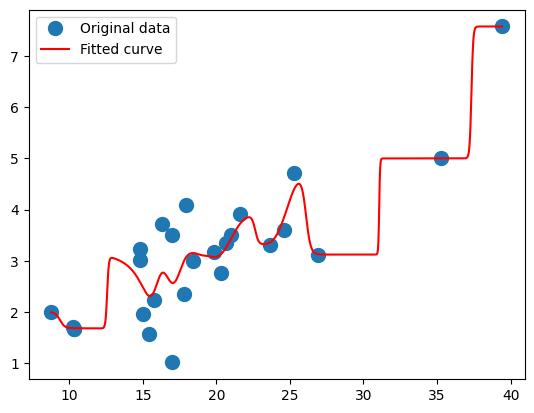

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def local_weighted_regression(x, y, x_test, tau):
  # Calculate weights for each data point
  weights = np.exp(-np.square(x - x_test)/(2*tau**2))
  
  # Perform weighted linear regression
  w = np.dot(weights, y) / np.sum(weights)
  return w

# Read data from CSV file using pandas
df = pd.read_csv('9.csv')
x = df['x'].to_numpy()
y = df['y'].to_numpy()

# Set the range of x-values for which to fit the curve
x_min = np.min(x)
x_max = np.max(x)
x_fit = np.linspace(x_min, x_max, 1000)

# Set the value of tau (the width of the Gaussian kernel)
tau = 0.5

# Fit the curve using LWR
y_fit = [local_weighted_regression(x, y, xi, tau) for xi in x_fit]

# Plot the data points and the fitted curve
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x_fit, y_fit, 'r', label='Fitted curve')
plt.legend()
plt.show()
